In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit

$\textbf{Definition of the classification algorithms:}$

In [83]:
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z))).T
    return sm

In [168]:
class LogisticRegressionClass():
    def __init__(self, learning_rate=0.01, stopping_criterion=0.01, max_iterations=1000, max_epochs=10):
        self.learning_rate = learning_rate
        self.stopping_criterion = stopping_criterion
        self.max_iterations = max_iterations
        self.max_epochs = max_epochs
        self.w = None
    
    def BinaryClassifier_fit(self, x, y):
        m = x.shape[0]
        n = x.shape[1]
        self.w = np.random.randn(n)
        gradient = np.zeros(n)
        cost = np.zeros(self.max_epochs)
        
        for epoch in range(0,self.max_epochs):
            for i in range(0,m):
                y_hat=expit(np.dot(self.w,x[i,:]))
                gradient=(y_hat-y[i])*x[i,:]
                self.w-=self.learning_rate*gradient
                cost[epoch]-=(y[i]*np.log(y_hat)+(1-y[i])*np.log(1-y_hat))
        
        plt.plot(cost)
        return self.w
    
    def MultinomialRegression_fit(self, x, y):
        if(x.shape[0]!=y.shape[0]):
            print "Number of examples of features and outputs don't match"
            return
        
        m = x.shape[0]
        n = x.shape[1]
        k = y.shape[1]
        
        self.w = np.random.randn(k,n)
        gradient = np.zeros((k,n))
        cost = np.zeros(self.max_epochs)
        
        for epoch in range(0,self.max_epochs):
            print epoch
            for i in range(0,m):
                y_hat = softmax(np.reshape(np.matmul(self.w,x[i,:]),k))
                for j in range(0,k):
                    gradient = (y_hat[j]-y[i,j])*x[i,:]
                    self.w[j,:]-=self.learning_rate*gradient
#                     cost[epoch]-=y[i,j]*np.log(y_hat[j])
        
#         plt.plot(cost)
        return self.w
    
    def BinaryClassifier_predict(self, x):
        m = x.shape[0]
        n = x.shape[1]
        y = np.zeros(m)
        for i in range(0,m):
            y[i] = expit(np.dot(self.w,x[i,:]))
        
        return y
    
    def MultinomialRegression_predict(self, x):
        m = x.shape[0]
        n = x.shape[1]
        
        k = self.w.shape[0]
        y = np.zeros((m,k))
        
        for i in range(0,m):
            y[i,:] = softmax(np.reshape(np.matmul(self.w,x[i,:]),k))
        
        return y

$1.\ \textbf{Binary Classification:}$ (Logistic regression)

$\hat{y}^{(i)} = \frac{1}{1+e^{-w^T x^{(i)}}}$

$L_i=-(y^{(i)}log(\hat{y}^{(i)})+(1-y^{(i)})log(1-\hat{y}^{(i)}))$

$L=\sum_{i=1}^m L_i$

$\nabla_w L^{(i)} = (\hat{y}^{(i)}-y^{(i)})\ x^{(i)}$

Stochastic gradient descent:

$w = w - \alpha \nabla_w L^{(i)}$

Data generation with randomized hypothesis:

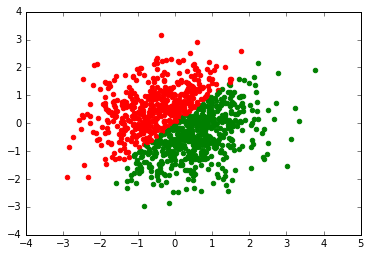

In [13]:
w=np.random.randn(2)

x=np.random.randn(1000,2)
y=np.zeros(1000)

for i in range(0,1000):
    if(np.dot(w,x[i,:])>0):
        y[i]=1
        plt.scatter(x[i,0],x[i,1],color='r')
    else:
        plt.scatter(x[i,0],x[i,1],color='g')
plt.show()

Training a binary classifier (logistic regression):

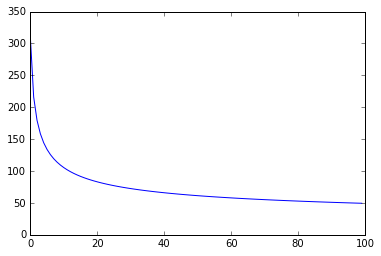

In [34]:
classifier = LogisticRegressionClass()
classifier.max_epochs=100

w_predicted = classifier.BinaryClassifier_fit(x,y)

Above is the plot of the cross entropy loss with respect to the epochs in training. It is clear that the loss is flattened towards the end of training showing convergence.

In [31]:
w_predicted

array([-8.42589388,  8.42607588])

In [24]:
w

array([-0.7447895 ,  0.74414992])

It is to be noted that in this case of classification, only the ratio of the predicted and weights need to be constant over all feature weights. This can be clearly seen from the above values of predicted and true feature weights.

Now we plot the predicted class of the data in the same training dataset. We can see the stark similirity to the ground truth class labels.

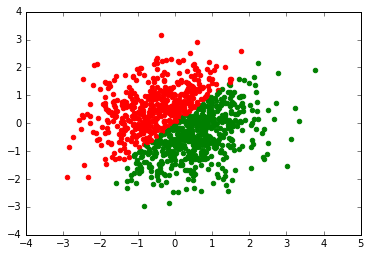

In [36]:
y_hat = classifier.BinaryClassifier_predict(x)

for i in range(0,1000):
    if(y_hat[i]>0.5):
        plt.scatter(x[i,0],x[i,1],color='r')
    else:
        plt.scatter(x[i,0],x[i,1],color='g')
plt.show()

$\textbf{Binary classification with non-linear features:}$

To classify data which has a non-linear decision boundary, we incluse the nonlinear terms as additional features. This way, we can convert the non-linear classification problem into a linear classification problem (with non-linear features). This will only work when the form of the non-linearity is known a priori.

Generating data with randomized hypothesis: (only square of features are included)

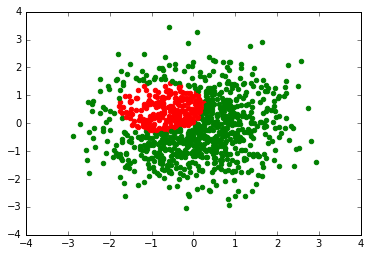

In [107]:
w=np.random.randn(4)

temp=np.random.randn(1000,2)
x=np.array([temp[:,0],temp[:,1],np.square(temp[:,0]),np.square(temp[:,1])]).T
y=np.zeros(1000)

for i in range(0,1000):
    if(np.dot(w,x[i,:])>0):
        y[i]=1
        plt.scatter(x[i,0],x[i,1],color='r')
    else:
        plt.scatter(x[i,0],x[i,1],color='g')
plt.show()

Traing a binary classifier (logistic regression):

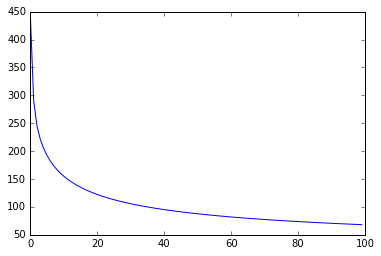

In [108]:
classifier = LogisticRegressionClass()
classifier.max_epochs=100

w_predicted = classifier.BinaryClassifier_fit(x,y)

The flattening of the cross entropy loss plotted above shows the convergence of classification. Now, we compare the predicted and actual feature weights:

In [109]:
w_predicted

array([-7.72857715,  7.50422611, -4.69724896, -6.52836327])

In [110]:
w

array([-0.72302959,  0.74910901, -0.46584099, -0.62882617])

Again, it should be noted that the ratio of the feture weights and true weights is what will remain constant for each feature weight.

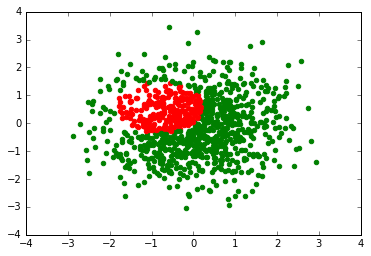

In [111]:
y_hat = classifier.BinaryClassifier_predict(x)

for i in range(0,1000):
    if(y_hat[i]>0.5):
        plt.scatter(x[i,0],x[i,1],color='r')
    else:
        plt.scatter(x[i,0],x[i,1],color='g')
plt.show()

It can be clearly seen that the plot of the class labels resembles closely the ground truth labels. The decision boundary (nearly an ellipse) is also captured as it is by the classifier. 

$\textbf{Multiclass Classification:}$

$\hat{y}_j$ is representative of the probability of the data point being $j^{th}$ class.

$\hat{y}_j=\frac{e^{w_j x}}{\sum_{j=1}^{k}e^{w_j x}}$

Cost function:

$L^{(i)}=-\sum_{j=1}^{k} y_j^{(i)} log(\hat{y}_k^{(i)})$

Stochastic Gradient Descent:

$\nabla_{w_j} L^{(i)} = (\hat{y}_j^{(i)}-y_j^{(i)})\ x^{(i)}$

$w_j = w_j - \alpha \nabla_{w_j} L^{(i)}$

Generating data with 4 labels: (randomized hypothesis)

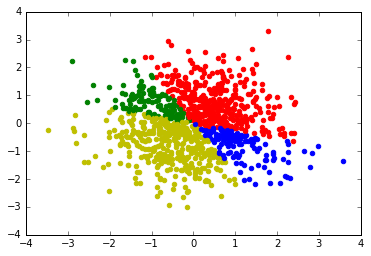

In [86]:
w=np.random.randn(2,2)

x=np.random.randn(1000,2)
y=np.zeros((1000,4))

for i in range(0,1000):
    if(np.dot(w[0,:],x[i,:])>0 and np.dot(w[1,:],x[i,:])>0):
        y[i,0]=1
        plt.scatter(x[i,0],x[i,1],color='r')
    elif(np.dot(w[0,:],x[i,:])>0 and np.dot(w[1,:],x[i,:])<0):
        y[i,1]=1
        plt.scatter(x[i,0],x[i,1],color='g')
    elif(np.dot(w[0,:],x[i,:])<0 and np.dot(w[1,:],x[i,:])>0):
        y[i,2]=1
        plt.scatter(x[i,0],x[i,1],color='b')
    elif(np.dot(w[0,:],x[i,:])<0 and np.dot(w[1,:],x[i,:])<0):
        y[i,3]=1
        plt.scatter(x[i,0],x[i,1],color='y')
        
plt.show()

Training a multiclass classifier (softmax classifier):

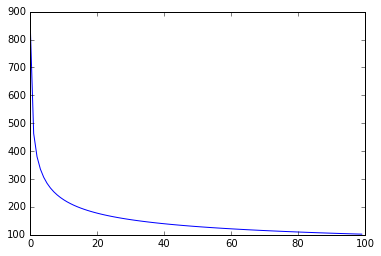

In [93]:
classifier = LogisticRegressionClass()
classifier.max_epochs=100

w_predicted = classifier.MultinomialRegression_fit(x,y)

The above plot of shows that the classifier converged.

In [94]:
w_predicted

array([[ 7.29685773,  9.49505768],
       [-3.15122426,  3.59764119],
       [ 4.11586414, -2.42254011],
       [-6.31388559, -8.39344282]])

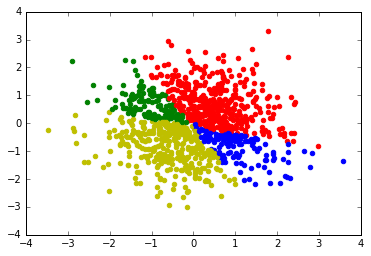

In [96]:
y_hat = classifier.MultinomialRegression_predict(x)

for i in range(0,1000):
    if(y_hat[i,0]>0.25):
        plt.scatter(x[i,0],x[i,1],color='r')
    elif(y_hat[i,1]>0.25):
        plt.scatter(x[i,0],x[i,1],color='g')
    elif(y_hat[i,2]>0.25):
        plt.scatter(x[i,0],x[i,1],color='b')
    elif(y_hat[i,3]>0.25):
        plt.scatter(x[i,0],x[i,1],color='y')
plt.show()

Clearly, this resembles the plot of the ground truth labels. Even the decision boundaries are captured by the classifier.

Which one of batch or stochastic gradient descent do you think will work better here? Why?

In the case of stochastic gradient descent, we'll have to anneal the learning rate as the training progresses because, the classifier will be biased towards the latest example shown to it. If we anneal the learning rate, this bias will diminish to zero. On the other hand, batch gradient descent doesn't have this issue converges to feature weights which minimize the total expected loss. So, batch gradient descent has better generalization properties. But, this comes with a computational cost. Hence, even though both work well enough, Batch gradient descent is expected to work better.

$2.\ \textbf{MNIST Data Classification:}$

Now, we use the multiclass classification method of sofmax classification to classify handwritten digits in the MNIST dataset. A fullfledged multiclass classification is performed below with the class lables from 0 to 9.

Extracting the dataset:

In [66]:
import gzip

def extract_data(filename, num_images):
  """Extract the images into a 4D tensor [image index, y, x, channels].
  Values are rescaled from [0, 255] down to [-0.5, 0.5].
  """
  print('Extracting', filename)
  with gzip.open(filename) as bytestream:
    bytestream.read(16)
    IMAGE_SIZE=28
    buf = bytestream.read(IMAGE_SIZE * IMAGE_SIZE * num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    #data = (data - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH
    data = data.reshape(num_images, IMAGE_SIZE, IMAGE_SIZE, 1)
    return data

def extract_labels(filename, num_images):
  """Extract the labels into a vector of int64 label IDs."""
  print('Extracting', filename)
  with gzip.open(filename) as bytestream:
    bytestream.read(8)
    buf = bytestream.read(1 * num_images)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
  return labels


train_data = extract_data('train-images-idx3-ubyte.gz', 60000)
train_label= extract_labels('train-labels-idx1-ubyte.gz',60000)

test_data = extract_data('t10k-images-idx3-ubyte.gz', 10000)
test_label = extract_labels('t10k-labels-idx1-ubyte.gz', 10000)

('Extracting', 'train-images-idx3-ubyte.gz')
('Extracting', 'train-labels-idx1-ubyte.gz')
('Extracting', 't10k-images-idx3-ubyte.gz')
('Extracting', 't10k-labels-idx1-ubyte.gz')


In [67]:
train_data.shape

(60000L, 28L, 28L, 1L)

In [68]:
print (np.max(train_data[0,:,:,:]), np.min(train_data[0,:,:,:]))

(255.0, 0.0)


Reshaping the data to roll out the images:

In [69]:
a = train_data.shape[1]
b = train_data.shape[2]
n = train_data.shape[0]

temp = np.zeros((n,a*b))

for i in range(0,n):
    temp[i,]=np.reshape(train_data[i,:,:,:],a*b)

train_data = temp

a = test_data.shape[1]
b = test_data.shape[2]
n = test_data.shape[0]

temp = np.zeros((n,a*b))

for i in range(0,n):
    temp[i,]=np.reshape(test_data[i,:,:,:],a*b)

test_data = temp

In [70]:
train_data.shape

(60000L, 784L)

In [71]:
test_data.shape

(10000L, 784L)

Generation of one hot vectors for both training data and testing data:

In [115]:
k=10

y_train=np.zeros((train_data.shape[0],k))

for i in range(0,train_data.shape[0]):
    y_train[i,train_label[i]]=1

y_test=np.zeros((test_data.shape[0],k))

for i in range(0,test_data.shape[0]):
    y_test[i,test_label[i]]=1

Training a softmax classifier for multiclass classification:

In [169]:
classifier = LogisticRegressionClass()
classifier.max_epochs = 100
classifier.learning_rate = 0.1

w_predicted = classifier.MultinomialRegression_fit(train_data,y_train)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


Predicting the class labels over the training dataset:

In [170]:
y_hat = classifier.MultinomialRegression_predict(test_data)

In [171]:
label_predict = np.zeros(test_label.shape[0])
k=10

for i in range(0,test_label.shape[0]):
    for j in range(0,k):
        if(y_hat[i,j]>0.1):
            label_predict[i] = j
            break

In [172]:
count=0
for i in range(0,label_predict.shape[0]):
    if(label_predict[i] != test_label[i]):
        count+=1
print "error rate of the classification was: %f percent" %(count*100/label_predict.shape[0])

error rate of the classification was: 13.000000 percent


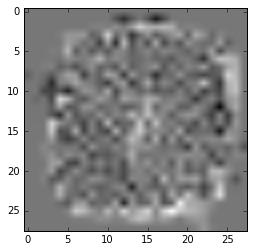

In [179]:
plt.imshow(np.reshape(classifier.w[0,:],(a,b)),cmap='binary')
plt.show()